In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = '/content/flights.csv'
df = pd.read_csv(url, dtype=str)
df.head(10)
print(df.info(null_counts=True))

<ipython-input-75-4b709ccadb52>:7: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(df.info(null_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513519 entries, 0 to 3513518
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   YEAR                 3513519 non-null  object
 1   MONTH                3513519 non-null  object
 2   DAY                  3513519 non-null  object
 3   DAY_OF_WEEK          3513519 non-null  object
 4   AIRLINE              3513519 non-null  object
 5   FLIGHT_NUMBER        3513519 non-null  object
 6   TAIL_NUMBER          3501830 non-null  object
 7   ORIGIN_AIRPORT       3513519 non-null  object
 8   DESTINATION_AIRPORT  3513519 non-null  object
 9   SCHEDULED_DEPARTURE  3513519 non-null  object
 10  DEPARTURE_TIME       3447448 non-null  object
 11  DEPARTURE_DELAY      3447448 non-null  object
 12  TAXI_OUT             3445473 non-null  object
 13  WHEELS_OFF           3445473 non-null  object
 14  SCHEDULED_TIME       3513513 non-null  object
 15  ELAPSED_TIME   

Зависимость: задержка,день недели.

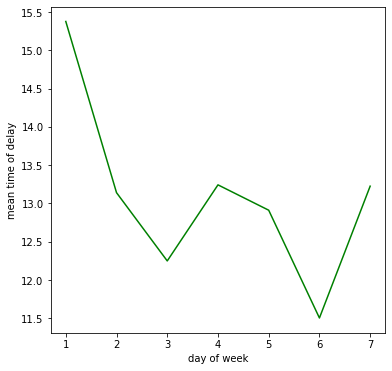

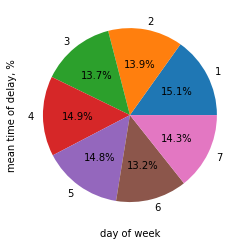

In [94]:
df=df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]
df['DEPARTURE_DELAY'] = df.DEPARTURE_DELAY.astype(float)
df.loc[df.DEPARTURE_DELAY < 0, 'DEPARTURE_DELAY'] = 0
df.DAY_OF_WEEK = df.DAY_OF_WEEK.astype(int)
day_of_week = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
day_of_week.plot(figsize=(6,6), c = 'g')
plt.xlabel('day of week')
plt.ylabel('mean time of delay')
plt.show()

df.loc[df.DEPARTURE_DELAY > 0, 'DAY_OF_WEEK'].value_counts()
n = df.loc[df.DEPARTURE_DELAY > 0, 'DAY_OF_WEEK'].value_counts()/df['DAY_OF_WEEK'].value_counts()*100
n.plot.pie(autopct='%1.1f%%')
plt.xlabel('day of week')
plt.ylabel('mean time of delay, %')
plt.show()

Круговая диаграмма и График количесвта задержек рейсов

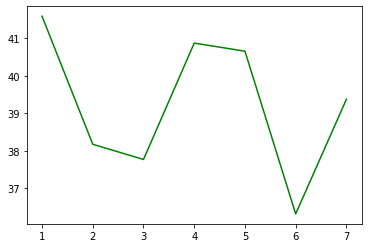

In [95]:
n.plot(figsize=(6,4),color='green')

Зависимость:задерка и месяц

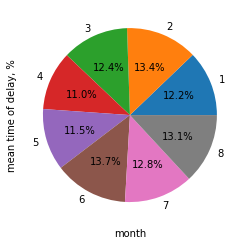

In [83]:
df.loc[df.DEPARTURE_DELAY > 0, 'MONTH'].value_counts()
n = df.loc[df.DEPARTURE_DELAY > 0, 'MONTH'].value_counts()/df['MONTH'].value_counts()*100
n.plot.pie(autopct='%1.1f%%')
plt.xlabel('month')
plt.ylabel('mean time of delay, %')
plt.show()

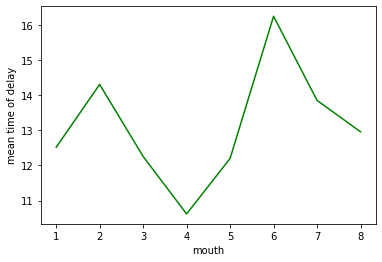

In [84]:
month = df.groupby('MONTH')['DEPARTURE_DELAY'].mean()
month.plot(figsize=(6,4),  color = 'green')
plt.xlabel('mouth')
plt.ylabel('mean time of delay')
plt.show()


Зависимость:задерка и время отправления

In [ ]:
df['HOUR'] = df.SCHEDULED_DEPARTURE.astype(int)/100
df['HOUR'] = df.HOUR.astype(int)
df['SCHEDULED_DEPARTURE'] = df.SCHEDULED_DEPARTURE.astype(float)

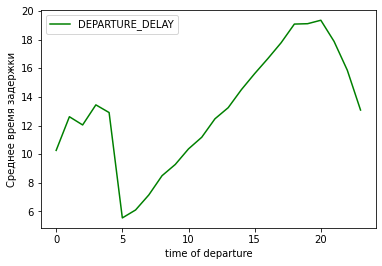

In [87]:
hour = pd.DataFrame(df.groupby('HOUR')['DEPARTURE_DELAY'].mean())
hour.plot(figsize=(6,4), color = 'green')
plt.xlabel('time of departure')
plt.ylabel('mean time of delay')
plt.show()

количесво задержанных рейсов(пробовал строить не в процентах а в абсолютных числах,выглядит не показательно)

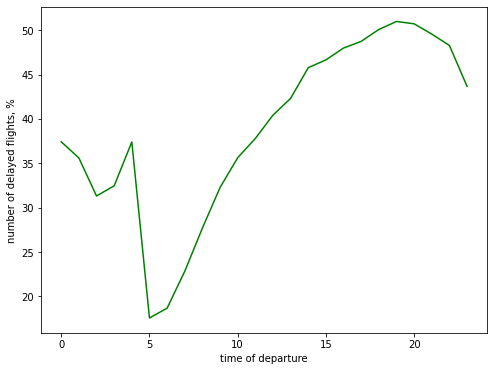

In [93]:
df.loc[df.DEPARTURE_DELAY > 0, 'HOUR'].value_counts()
number = df.loc[df.DEPARTURE_DELAY > 0, 'HOUR'].value_counts()/df['HOUR'].value_counts()*100
number.plot(figsize=(8,6), color = 'green')
plt.xlabel('time of departure')
plt.ylabel('number of delayed flights, %')
plt.show()

Графики времени и количесва почти совпадают,
и показывают что вечерние рейсы задерживаются на дольше и в большем проценте случаев(вероятно из - за уменьшения видимости и общей сонливости в людей :) )

Зависимость: день месяца и задержка

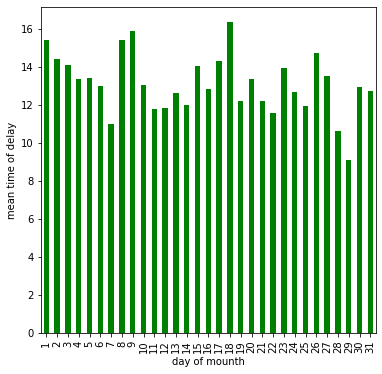

In [100]:
df['DEPARTURE_DELAY'] = df.DEPARTURE_DELAY.astype(float)
df.loc[df.DEPARTURE_DELAY < 0, 'DEPARTURE_DELAY'] = 0
df.DAY = df.DAY.astype(int)
day_of_week = df.groupby('DAY')['DEPARTURE_DELAY'].mean()
day_of_week.plot.bar(figsize=(6,6),  color = 'green')
plt.xlabel('day of mounth')
plt.ylabel('mean time of delay')
plt.show()

Решил посмотреть на количество задержек по месяцам.
Если сравнивать с таким же графиком по неделям,то можно отметить что под конец месяца,задержки ниже чем в начале,но разница не критична

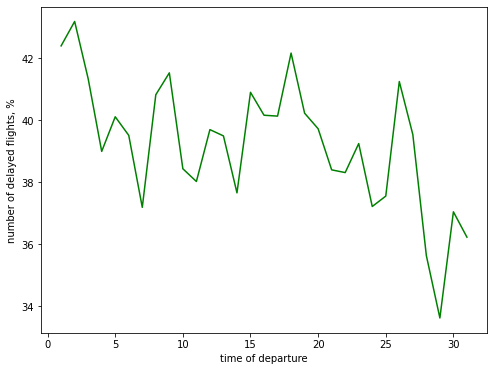

In [101]:
df.loc[df.DEPARTURE_DELAY > 0, 'DAY'].value_counts()
number = df.loc[df.DEPARTURE_DELAY > 0, 'DAY'].value_counts()/df['DAY'].value_counts()*100
number.plot(figsize=(8,6), color = 'green')
plt.xlabel('day of mounth')
plt.ylabel('number of delayed flights, %')
plt.show()

Здесь лучше видно что чем ближе конец месяца тем меньше количество задержанных рейсов

ЗАвисимость: авиакомпания и количесвто задержек

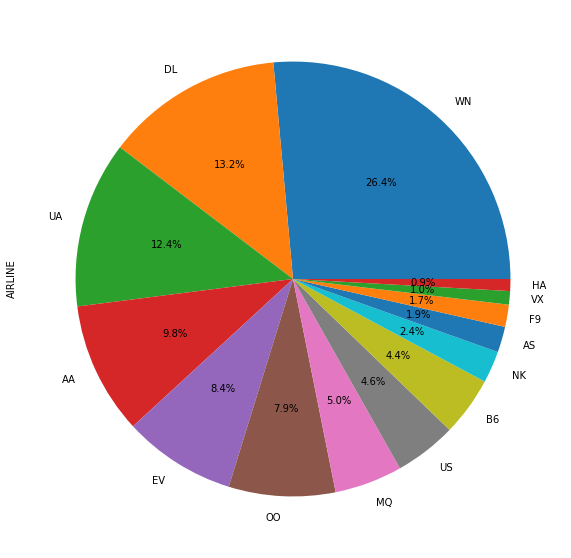

In [108]:
cmp1 = df.loc[df.DEPARTURE_DELAY > 0, 'AIRLINE'].value_counts()/len(df)*100
cmp1.plot.pie(figsize=(10,10),autopct='%1.1f%%')

3 аэропорта вносят больше половины количесва задержек,следует вывод что можно разгрузить 3 этих аэропорта либо увеличить проходимость внутри